# Laboratorium 04 - Efekt Rungego
## Błażej Naziemiec i Szymon Żuk
### 30 marca 2025
## Wstęp
Celem laboratorium było zapoznanie się z efektrm Rungego, czyli pogarszaniu się interpolacji wraz z zwiększaniem liczby węzłów. Aby to zaprezentować, należało zaimplementować interpolację wielomianową w kilku wariantach: wielomianów Lagrange'a z równoodległymi węzłami, kubicznymi funkcjami sklejanymi z równoodległymi węzłami oraz wielomianów Lagrange'a z węzłąmi Czebyszewa. Dodatkowo dla przedziału $[-1, 1]$ należało wygenerować punkty: Czebyszewa, Legrendre'a oraz równomiernie rozłożone dla $n=10, 20, 50$. 

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, lagrange


def generate_chebyshev_nodes(n):
    i = np.arange(n)
    return -np.cos(i * np.pi / n)


def generate_legendre_nodes(n):
    return np.polynomial.legendre.leggauss(n)[0]


def generate_uniform_nodes(n):
    return np.linspace(-1, 1, n)


def calculate_distance_geometric_mean(x_vec, index):
    x = x_vec[index]
    distances = np.array([abs(xi - x) for xi in x_vec if xi != x])
    return np.prod(distances) ** (1 / len(distances))

Najpierw używając wzoru na punkty Czebyszewa: $$ \begin{equation}
t_i = -\cos\left(\frac{i}{n}\pi\right), \quad i = 0, \ldots, n
\end{equation} $$funkcji `np.polynomial.legendre.leggauss(n)` i `np.linspace(-1, 1, n)` wyznaczyliśmy odpowiednio punkty Czybyszewa, Legendre'a i równomiernie rozmieszczone. Następnie dla każdego zbioru punktów i dla $n=10, 20, 50$ wyznaczyliśmy wykresy średniej geometrycznej odległości od pozostałych punktów.

In [44]:
def plot_points(x_vec_list, labels, title):
    for x_vec, label in zip(x_vec_list, labels):
        y_vec = [calculate_distance_geometric_mean(x_vec, i) for i in range(len(x_vec))]
        plt.plot(x_vec, y_vec, label=label)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

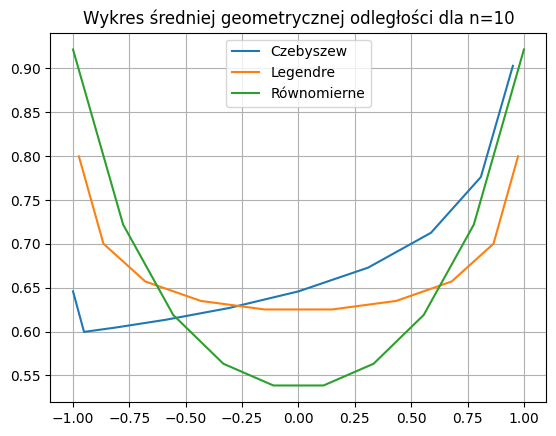

In [45]:
n = 10
plot_points([generate_chebyshev_nodes(n),
                 generate_legendre_nodes(n),
                 generate_uniform_nodes(n)],
                ["Czebyszew", "Legendre", "Równomierne"],
                f"Wykres średniej geometrycznej odległości dla n={n}")

*Wykres 1. Średnia geometryczna odległości dla n=10*

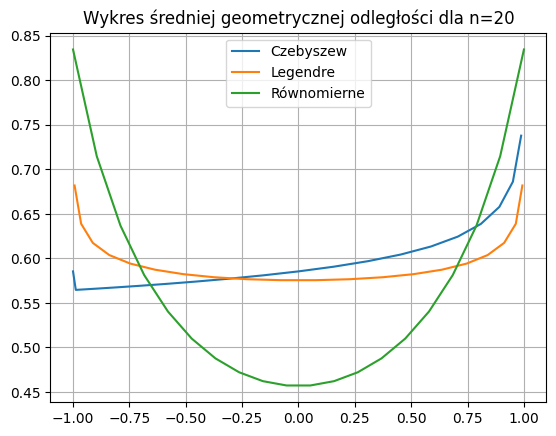

In [46]:
n = 20
plot_points([generate_chebyshev_nodes(n),
                 generate_legendre_nodes(n),
                 generate_uniform_nodes(n)],
                ["Czebyszew", "Legendre", "Równomierne"],
                f"Wykres średniej geometrycznej odległości dla n={n}")

*Wykres 2. Średnia geometryczna odległości dla n=20*

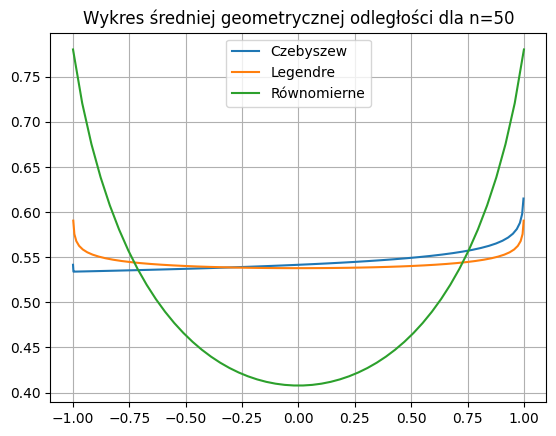

In [47]:
n = 50
plot_points([generate_chebyshev_nodes(n),
                 generate_legendre_nodes(n),
                 generate_uniform_nodes(n)],
                ["Czebyszew", "Legendre", "Równomierne"],
                f"Wykres średniej geometrycznej odległości dla n={n}")


*Wykres 3. Średnia geometryczna odległości dla n=50*

Jak widać na wykresach 1-3, średnia geometryczna odległości jest bardzo zbliżona dla wszystkich punktów Czebyszewa i Legendre'a, a dla punktów równomiernie rozłożonych rośnie w zależności od odległości punktu od 0. Im większe $n$ tym gładszy wykres i w przypadku punktów Legendre i Czebyszewa mniejsza średnia dla wartości brzegowych.

W następnej części zadania mieliśmy wyznaczyć wielomiany interpolujące funkcje

$$f_1(x) = \frac{1}{1 + 25x^2} \text{ na przedziale } [-1, 1]\,,$$

$$f_2(x) = \exp(\cos(x)) \text{ na przedziale } [0, 2\pi]\,,$$

za pomocą 

- wielomianów Lagrange'a z równoodległymi węzłami 

- kubicznych funkcji sklejanych z równoodległymi węzłami 

- wielomianów Lagrange'a z węzłami Czebyszewa

Używając funkcji `np.linspace(a, b, n)` i wzoru na węzły Czebyszewa: $$ \begin{equation}
x_j = -\cos(\theta_j) \ \ \ \theta_j = \frac{2j - 1}{2n}\pi, \; 1 \leq j \leq n\,.
\end{equation} $$wyznaczyliśmy odpowiednio węzły równoodległe i Czebyszewa dla $n=12$ oraz zbiór punktów do próbkowania dla $n=120$ (10 razy gęstszy zbiór). Następnie obliczyliśmy wartości funkcji Rungego dla węzłów. Potem używając funkcji `scipy.interpolate.lagrange(x_vec, y_vec)` i `scipy.interpolate.CubicSpline(x_vec, y_vec)` otrzymaliśmy wielomiany interpolacyjne Lagrange'a z równoogległumi węzłami, kubiczną funkcję sklejaną z równoogległumi węzłami i wielomiany interpolacyjne Lagrange'a z węzłami Czebyszewa.

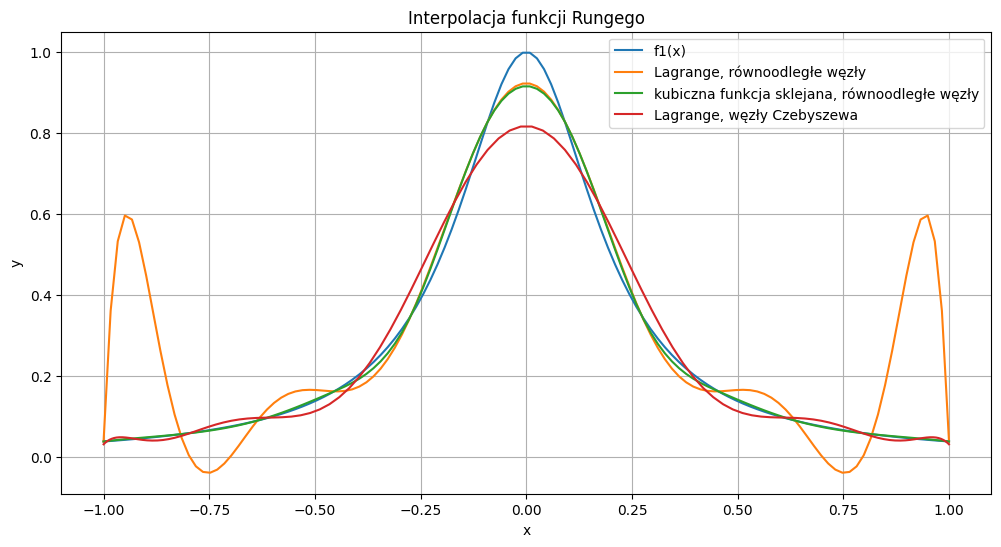

In [48]:
f1 = lambda x: 1 / (1 + 25 * x ** 2)
range1 = (-1, 1)
f2 = lambda x: np.exp(np.cos(x))
range2 = (0, 2 * np.pi)


def generate_uniform_nodes(n: int, range_: (float, float)):
    a, b = range_
    return np.linspace(a, b, n)


def generate_chebyshev_nodes(n: int, range_: (float, float)):
    a, b = range_
    i = np.arange(1, n + 1)
    return (a + b) / 2 + (b - a) / 2 * -np.cos((2 * i - 1) * np.pi / (2 * n))


n = 12

uniform_x = generate_uniform_nodes(n, range1)
uniform_f1 = f1(uniform_x)
chebyshev_x = generate_chebyshev_nodes(n, range1)
chebyshev_f1 = f1(chebyshev_x)

uniform_x_plot = generate_uniform_nodes(n * 10, range1)
chebyshev_x_plot = generate_chebyshev_nodes(n * 10, range1)

uniform_lagrange_polynomial = lagrange(uniform_x, uniform_f1)
uniform_cubic_spline = CubicSpline(uniform_x, uniform_f1)
chebyshev_lagrange_polynomial = lagrange(chebyshev_x, chebyshev_f1)

plt.figure(figsize=(12, 6))

plt.plot(uniform_x_plot, f1(uniform_x_plot), label='f1(x)')
plt.plot(uniform_x_plot, uniform_lagrange_polynomial(uniform_x_plot), label='Lagrange, równoodległe węzły')
plt.plot(uniform_x_plot, uniform_cubic_spline(uniform_x_plot), label='kubiczna funkcja sklejana, równoodległe węzły')
plt.plot(chebyshev_x_plot, chebyshev_lagrange_polynomial(chebyshev_x_plot), label='Lagrange, węzły Czebyszewa')

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Interpolacja funkcji Rungego')
plt.legend()
plt.grid(True)
plt.show()

*Wykres 4. Interpolacja funkcji Rungego*

Jak widać funkcje interpolacyjne są w większości punktów bardzo zbliżone do funkcji Rungego. W pobliżu $x=0$ funkcje interpolacyjne przyjmują trochę za małe wartości, w szczególności wielomian Lagrange'a z węzłami Czebyszewa. Dla $abs(x)>0.6$ wielomian interpolacyjny Lagrange'a z równoodległymi węzłami ma wartości znacznie odbiegające od interpolowanej funkcji. Najlepszym przybliżeniem jest zatem kubiczna funkcja sklejana.

Następnie przeprowadziliśmy interpolację funkcji $f_1$ i $f_2$ z $n = 4, 5, ..., 50$ korzystając z poprzednio użytych 3 metod. Wygenerowaliśmy zbiory 500 losowych punktów na dziedzinach funkcji, po czym obliczyliśmy wartości funkcji interpolacyjnych dla tych punktów. Następnie wyznaczyliśmy normę wektora błędu dla każdego $n$ i poszczególnych metod.

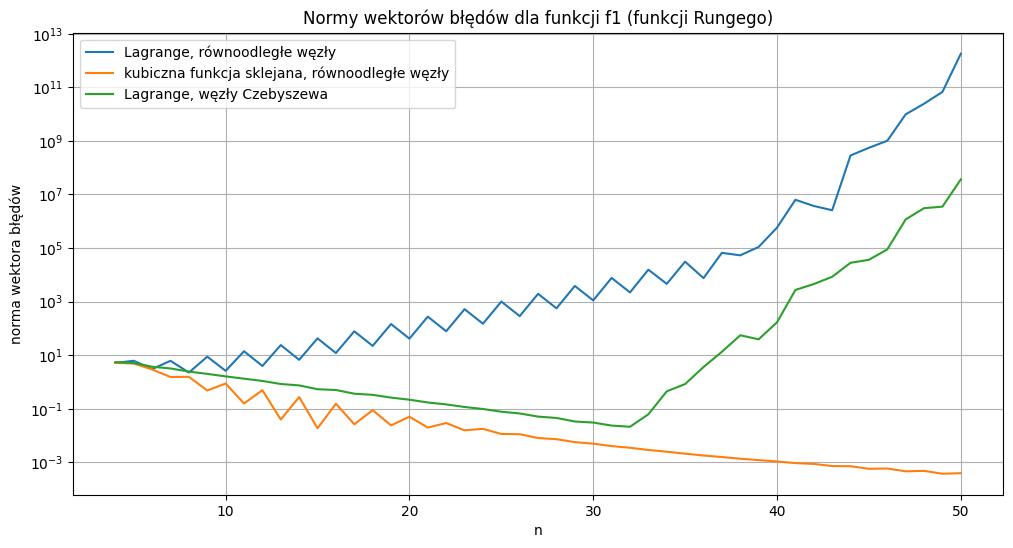

In [49]:
def generate_500_rand_points(range_: (float, float)):
    a, b = range_
    points = np.random.uniform(low=a, high=b, size=500)
    points.sort()
    return points


def generate_interpolated_y_vec(x_nodes, x_vec, func, interpolation_method):
    y_nodes = func(x_nodes)
    interpolated_func = interpolation_method(x_nodes, y_nodes)
    return interpolated_func(x_vec)


n_range = range(4, 51)
x_vec_range1 = generate_500_rand_points(range1)
x_vec_range2 = generate_500_rand_points(range2)
y_vec_range1 = f1(x_vec_range1)
y_vec_range2 = f2(x_vec_range2)

f1_lagrange_uniform = [generate_interpolated_y_vec(
    generate_uniform_nodes(n, range1),
    x_vec_range1,
    f1, lagrange
) for n in n_range]
f2_lagrange_uniform = [generate_interpolated_y_vec(
    generate_uniform_nodes(n, range2),
    x_vec_range2,
    f2, lagrange
) for n in n_range]

f1_cubic_spline_uniform = [generate_interpolated_y_vec(
    generate_uniform_nodes(n, range1),
    x_vec_range1,
    f1, CubicSpline
) for n in n_range]
f2_cubic_spline_uniform = [generate_interpolated_y_vec(
    generate_uniform_nodes(n, range2),
    x_vec_range2,
    f2, CubicSpline
) for n in n_range]

f1_lagrange_chebyshev = [generate_interpolated_y_vec(
    generate_chebyshev_nodes(n, range1),
    x_vec_range1,
    f1, lagrange
) for n in n_range]
f2_lagrange_chebyshev = [generate_interpolated_y_vec(
    generate_chebyshev_nodes(n, range2),
    x_vec_range2,
    f2, lagrange
) for n in n_range]


def get_norms(vectors):
    return [np.linalg.norm(vec) for vec in vectors]


f1_lagrange_uniform_err = get_norms(abs(f1_lagrange_uniform - y_vec_range1))
f2_lagrange_uniform_err = get_norms(abs(f2_lagrange_uniform - y_vec_range2))
f1_cubic_spline_uniform_err = get_norms(abs(f1_cubic_spline_uniform - y_vec_range1))
f2_cubic_spline_uniform_err = get_norms(abs(f2_cubic_spline_uniform - y_vec_range2))
f1_lagrange_chebyshev_err = get_norms(abs(f1_lagrange_chebyshev - y_vec_range1))
f2_lagrange_chebyshev_err = get_norms(abs(f2_lagrange_chebyshev - y_vec_range2))
plt.figure(figsize=(12, 6))

plt.semilogy(n_range, f1_lagrange_uniform_err, label='Lagrange, równoodległe węzły')
plt.semilogy(n_range, f1_cubic_spline_uniform_err, label='kubiczna funkcja sklejana, równoodległe węzły')
plt.semilogy(n_range, f1_lagrange_chebyshev_err, label=f'Lagrange, węzły Czebyszewa')

plt.xlabel('n')
plt.ylabel('norma wektora błędów')
plt.title('Normy wektorów błędów dla funkcji f1 (funkcji Rungego)')
plt.legend()
plt.grid(True)
plt.show()

*Wykres 5. Normy wektorów błędów dla funkcji f1*

Jak widać na wykresie zdecydowanie najlepszą metodą interpolacji jest kubiczna funkcja sklejana z równoodległymi węzłami. Wielomian Lagrange'a z węzłami Czybyszewa zaczyna tracić dokładność około $n=33$, a z równoodległymi węzłami jest niedokładny nawet dla małych n. Dla wielomianów Lagrange'a widać tutaj efekt Rungego - dla dużych $n$ interpolacja jest niedokładna.

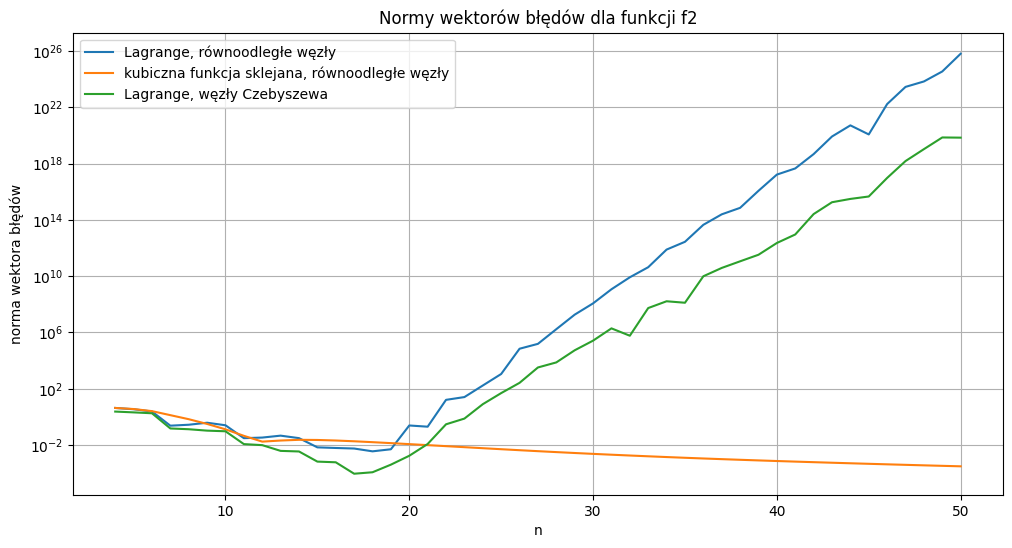

In [50]:


plt.figure(figsize=(12, 6))

plt.semilogy(n_range, f2_lagrange_uniform_err, label='Lagrange, równoodległe węzły')
plt.semilogy(n_range, f2_cubic_spline_uniform_err, label='kubiczna funkcja sklejana, równoodległe węzły')
plt.semilogy(n_range, f2_lagrange_chebyshev_err, label=f'Lagrange, węzły Czebyszewa')

plt.xlabel('n')
plt.ylabel('norma wektora błędów')
plt.title('Normy wektorów błędów dla funkcji f2')
plt.legend()
plt.grid(True)
plt.show()

*Wykres 6. Normy wektorów błędów dla funkcji f2*

Jak widać na wykresie najlepszą metodą interpolacji jest znowu kubiczna funkcja sklejana z równoodległymi węzłami. Tym razem wielomian Lagrange'a zaczyna tracić dokładność około $n = 20$ i traci ją niezależnie od użytych węzłów. Dla wielomianów Lagrange'a znów widać tutaj efekt Rungego - dla dużych $n$ interpolacja jest niedokładna.

Podsumowając w każdym przypadku kubiczna funkcja sklejana z węzłami równoodległymi okazała się być najlepszą metodą interpolacji, a wielomian Lagrange'a z węzłami równoodległymi najgorszą i podatną na efekt Rungego.

## Bibliografia

 - Materiały zamieszczone na platformie Microsoft Teams w zespole $\textit{MOwNiT 2025}$ w zakładce $\textit{Materiały z zajęć/lab04/lab-intro04.pdf}$